<img src="https://user-images.githubusercontent.com/70644724/140609517-8fecc801-ce21-4d0c-8969-70201eb5ba63.png" style="width:80px; float: left; margin: 0 15px 15px 15px;"></img>
    
# Python

    
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




## Practice assignment 6



> Data Wrangling with Python (3.8.12) 

In [1]:
import pandas as pd
import numpy as np

In [2]:
fx_header = ["date", "rate", "status","comment"]
speeches = pd.read_csv("speeches.csv", header = 0, sep = "|", usecols = ['date','contents'])
fx = pd.read_csv("fx.csv", sep = ",", engine='python', names = fx_header)

In [3]:
fx = fx[6:5938] # stores rows with data to df
fx

,date,rate,status,comment
6,2021-12-03,1.1291,Normal value (A),NaN
7,2021-12-02,1.1339,Normal value (A),NaN
8,2021-12-01,1.1314,Normal value (A),NaN
9,2021-11-30,1.1363,Normal value (A),NaN
10,2021-11-29,1.1276,Normal value (A),NaN
...,...,...,...,...
5933,1999-01-08,1.1659,Normal value (A),NaN
5934,1999-01-07,1.1632,Normal value (A),NaN
5935,1999-01-06,1.1743,Normal value (A),NaN
5936,1999-01-05,1.1790,Normal value (A),NaN


In [4]:
df = fx.join(speeches.set_index('date'), on='date')
df = df[['date', 'rate', 'status', 'contents']] #set columns
df = df.drop_duplicates(['date']) 
df = df.sort_values(['date'], ascending=[1])
df

,date,rate,status,contents
5937,1999-01-04,1.1789,Normal value (A),NaN
5936,1999-01-05,1.1790,Normal value (A),NaN
5935,1999-01-06,1.1743,Normal value (A),NaN
5934,1999-01-07,1.1632,Normal value (A),NaN
5933,1999-01-08,1.1659,Normal value (A),NaN
...,...,...,...,...
10,2021-11-29,1.1276,Normal value (A),SPEECH Dialogue in a changing world Lect...
9,2021-11-30,1.1363,Normal value (A),NaN
8,2021-12-01,1.1314,Normal value (A),NaN
7,2021-12-02,1.1339,Normal value (A),NaN


In [5]:
df['rate'] = df.iloc[:,1].replace(r'-', np.nan, regex=True) #converts '-' to NA value

In [6]:
#Fill NA's with previous value

df[['rate']] = df[['rate']].fillna(method='ffill')
df

,date,rate,status,contents
5937,1999-01-04,1.1789,Normal value (A),NaN
5936,1999-01-05,1.1790,Normal value (A),NaN
5935,1999-01-06,1.1743,Normal value (A),NaN
5934,1999-01-07,1.1632,Normal value (A),NaN
5933,1999-01-08,1.1659,Normal value (A),NaN
...,...,...,...,...
10,2021-11-29,1.1276,Normal value (A),SPEECH Dialogue in a changing world Lect...
9,2021-11-30,1.1363,Normal value (A),NaN
8,2021-12-01,1.1314,Normal value (A),NaN
7,2021-12-02,1.1339,Normal value (A),NaN


In [7]:
df['retur'] = df.iloc[:,1].astype(float) / df.iloc[:,1].shift().astype(float) # add return column

In [8]:
df

,date,rate,status,contents,retur
5937,1999-01-04,1.1789,Normal value (A),NaN,NaN
5936,1999-01-05,1.1790,Normal value (A),NaN,1.000085
5935,1999-01-06,1.1743,Normal value (A),NaN,0.996014
5934,1999-01-07,1.1632,Normal value (A),NaN,0.990548
5933,1999-01-08,1.1659,Normal value (A),NaN,1.002321
...,...,...,...,...,...
10,2021-11-29,1.1276,Normal value (A),SPEECH Dialogue in a changing world Lect...,0.998672
9,2021-11-30,1.1363,Normal value (A),NaN,1.007716
8,2021-12-01,1.1314,Normal value (A),NaN,0.995688
7,2021-12-02,1.1339,Normal value (A),NaN,1.002210


In [9]:
# Add good and bad news columns
df['good_news'] = np.where((df.retur >= 1.005) | (df.retur > 1.005), '1', '0')
df['bad_news'] = np.where((df.retur <= 0.995) | (df.retur < 0.995), '1', '0')
df

,date,rate,status,contents,retur,good_news,bad_news
5937,1999-01-04,1.1789,Normal value (A),NaN,NaN,0,0
5936,1999-01-05,1.1790,Normal value (A),NaN,1.000085,0,0
5935,1999-01-06,1.1743,Normal value (A),NaN,0.996014,0,0
5934,1999-01-07,1.1632,Normal value (A),NaN,0.990548,0,1
5933,1999-01-08,1.1659,Normal value (A),NaN,1.002321,0,0
...,...,...,...,...,...,...,...
10,2021-11-29,1.1276,Normal value (A),SPEECH Dialogue in a changing world Lect...,0.998672,0,0
9,2021-11-30,1.1363,Normal value (A),NaN,1.007716,1,0
8,2021-12-01,1.1314,Normal value (A),NaN,0.995688,0,0
7,2021-12-02,1.1339,Normal value (A),NaN,1.002210,0,0


In [10]:
#Remove entries where contents have NA value:
df_NA_fix = df[pd.notnull(df['contents'])]
df_NA_fix

,date,rate,status,contents,retur,good_news,bad_news
5929,1999-01-14,1.1653,Normal value (A),The euro has arrived Speech by the Preside...,0.992251,0,1
5928,1999-01-15,1.1626,Normal value (A),European economic and monetary union - lates...,0.997683,0,0
5927,1999-01-18,1.1612,Normal value (A),Hearing at the European Parliament's Sub-Com...,0.998796,0,0
5922,1999-01-25,1.1584,Normal value (A),Finnish savers and investors in the euro are...,1.001470,0,0
5919,1999-01-28,1.1410,Normal value (A),The euro - four weeks after the start Prof...,0.989678,0,1
...,...,...,...,...,...,...,...
16,2021-11-19,1.1271,Normal value (A),SPEECH Commitment and persistence: monetar...,0.993477,0,1
15,2021-11-22,1.1278,Normal value (A),SPEECH Ralph Koijen’s contribution to rese...,1.000621,0,0
12,2021-11-25,1.1223,Normal value (A),SPEECH When you need change to preserve co...,1.001517,0,0
11,2021-11-26,1.1291,Normal value (A),SPEECH Change and continuity in law Keyn...,1.006059,1,0


In [11]:
#Create df where good_news = 1
good_news = df_NA_fix.loc[df_NA_fix['good_news'] == '1']
good_news

,date,rate,status,contents,retur,good_news,bad_news
5911,1999-02-09,1.1333,Normal value (A),The single European monetary policy Speech...,1.007736,1,0
5900,1999-02-24,1.1037,Normal value (A),EMU and banking supervision Lecture by Tom...,1.006199,1,0
5892,1999-03-08,1.0908,Normal value (A),First experiences with the euro Speech by ...,1.006830,1,0
5890,1999-03-10,1.0953,Normal value (A),The euro as a new world currency Eugenio D...,1.008285,1,0
5885,1999-03-17,1.0966,Normal value (A),The external representation of the euro area...,1.005963,1,0
...,...,...,...,...,...,...,...
389,2020-06-10,1.1375,Normal value (A),"SPEECH Frankfurt am Main, 10 June 2020 Eur...",1.007172,1,0
359,2020-07-22,1.1578,Normal value (A),"SPEECH Frankfurt am Main, 22 July 2020 Bui...",1.011798,1,0
323,2020-09-10,1.1849,Normal value (A),SPEECH Payments in a digital world Speec...,1.006455,1,0
25,2021-11-08,1.1579,Normal value (A),SPEECH Inflation in the short term and in ...,1.005209,1,0


In [12]:
#Create df where bad_news = 1
bad_news = df_NA_fix.loc[df_NA_fix['bad_news'] == '1']
bad_news

,date,rate,status,contents,retur,good_news,bad_news
5929,1999-01-14,1.1653,Normal value (A),The euro has arrived Speech by the Preside...,0.992251,0,1
5919,1999-01-28,1.1410,Normal value (A),The euro - four weeks after the start Prof...,0.989678,0,1
5883,1999-03-19,1.0915,Normal value (A),Les implications internationales de l'introd...,0.991191,0,1
5838,1999-05-21,1.0572,Normal value (A),The euro: the birth of a new currency Pres...,0.993702,0,1
5835,1999-05-26,1.0535,Normal value (A),First experience with the euro Speech deli...,0.991343,0,1
...,...,...,...,...,...,...,...
203,2021-03-01,1.2053,Normal value (A),SPEECH The coronavirus crisis and SMEs S...,0.994390,0,1
65,2021-09-13,1.1780,Normal value (A),SPEECH New narratives on monetary policy –...,0.994848,0,1
60,2021-09-20,1.1711,Normal value (A),SPEECH Asset purchases: from crisis to rec...,0.994143,0,1
52,2021-09-30,1.1579,Normal value (A),SPEECH Cyber risks and the integrity of di...,0.993564,0,1


In [13]:
# Find and arrange the 20 most common words by frequence
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\e2u\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\e2u\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# For good indicators

good_news['contents2'] = good_news.contents.str.lower().str.replace('\W', ' ')
good_news['token'] = good_news.contents2.apply(nltk.tokenize.word_tokenize)

words = good_news.token.tolist()  
words = [word for list_ in words for word in list_]

# frequency distribution
word_dist = nltk.FreqDist(words)

# extend and remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
stopwords2 = ['de','la', 'der','die','term','â','also','area','und','en','would']
stopwords.extend(stopwords2) 
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)

#output the 20 most common words
count = 20 
good_indi = pd.DataFrame(words_except_stop_dist.most_common(count), columns=['word', 'freq'])

C:\Users\e2u\AppData\Local\Temp/ipykernel_14844/2185597679.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  good_news['contents2'] = good_news.contents.str.lower().str.replace('\W', ' ')
C:\Users\e2u\AppData\Local\Temp/ipykernel_14844/2185597679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_news['contents2'] = good_news.contents.str.lower().str.replace('\W', ' ')
C:\Users\e2u\AppData\Local\Temp/ipykernel_14844/2185597679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [15]:
good_indi

,word,freq
0,euro,5310
1,financial,4721
2,policy,4643
3,monetary,4233
4,ecb,2788
5,economic,2707
6,central,2695
7,market,2694
8,banks,2490
9,stability,2421


In [16]:
#save good_indicators to csv
good_indi.to_csv('good_indicators.csv',encoding='utf-8', index=False)

In [17]:
# For bads indicators

bad_news['contents2'] = bad_news.contents.str.lower().str.replace('\W', ' ')
bad_news['token'] = bad_news.contents2.apply(nltk.tokenize.word_tokenize)

words2 = bad_news.token.tolist()  
words2 = [word for list_ in words2 for word in list_]

# frequency distribution
word_dist2 = nltk.FreqDist(words2)

#remove stopwords
words_except_stop_dist2 = nltk.FreqDist(w for w in words2 if w not in stopwords)

#output the 20 most common words
count2 = 20 
bad_indi = pd.DataFrame(words_except_stop_dist2.most_common(count2), columns=['word', 'freq'])

C:\Users\e2u\AppData\Local\Temp/ipykernel_14844/2494207482.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  bad_news['contents2'] = bad_news.contents.str.lower().str.replace('\W', ' ')
C:\Users\e2u\AppData\Local\Temp/ipykernel_14844/2494207482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_news['contents2'] = bad_news.contents.str.lower().str.replace('\W', ' ')
C:\Users\e2u\AppData\Local\Temp/ipykernel_14844/2494207482.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [18]:
bad_indi

,word,freq
0,euro,6157
1,financial,5031
2,policy,4712
3,monetary,4366
4,banks,3018
5,market,2867
6,central,2760
7,economic,2746
8,ecb,2721
9,stability,2437


In [19]:
#save bad_indicators to csv
bad_indi.to_csv('bad_indicators.csv',encoding='utf-8', index=False)

<AxesSubplot:xlabel='word'>

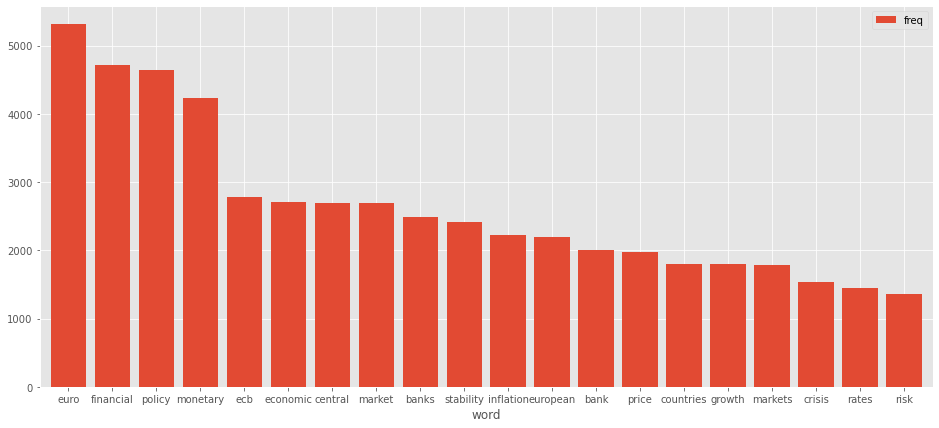

In [20]:
#Bar chart of good indicators
import matplotlib
import matplotlib.pyplot as plt


good_indi2 = good_indi.set_index('word')
matplotlib.style.use('ggplot')
good_indi2.plot.bar(rot=0, figsize=(16,7), width=0.8)

<AxesSubplot:xlabel='word'>

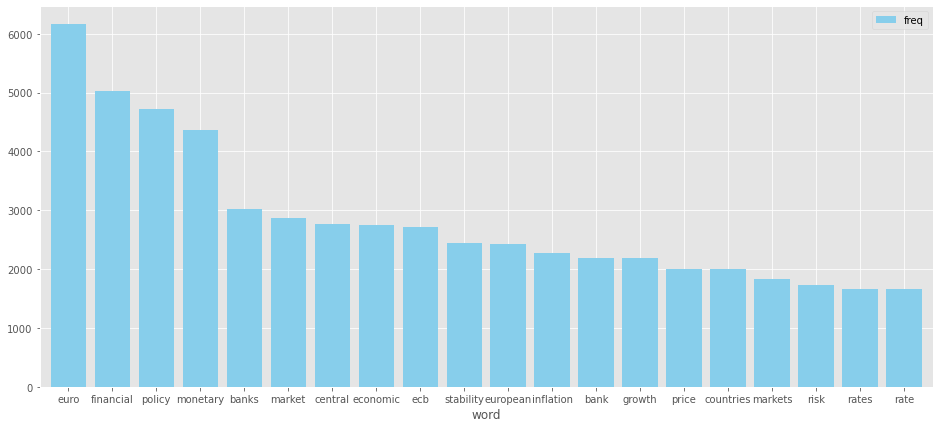

In [21]:
#Bar chart of bad indicators

bad_indi2 = bad_indi.set_index('word')
bad_indi2.plot.bar(rot=0, figsize=(16,7), width=0.8, color='skyblue')

